In [98]:
!pip install numpy
!pip install matplotlib
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [99]:
# make the mean and covariance the same as the mml book
mean = np.array([0, 2])
cov = np.array([[0.3, -1], [-1, 5]])
# generate the samples with the size of 200
samples = np.random.multivariate_normal(mean, cov, size=200) 
samples

array([[ 8.16575793e-02,  3.99289987e+00],
       [-4.81558439e-01,  4.32988950e+00],
       [ 9.71352000e-01, -1.84683311e+00],
       [ 3.34085720e-01,  1.11982196e+00],
       [-6.27903634e-03,  1.26269269e+00],
       [ 2.34139895e-01,  1.05025054e+00],
       [-8.31437828e-01,  4.65492594e+00],
       [-1.62039391e-01,  2.63140315e+00],
       [ 3.10345449e-02,  2.33494471e+00],
       [ 4.71889222e-02,  2.49167444e+00],
       [-1.63537934e+00,  6.67894192e+00],
       [ 1.24275915e-01,  7.48528108e-01],
       [ 3.36007567e-01,  9.97994991e-01],
       [ 6.51517164e-01,  2.18140380e+00],
       [ 3.89226744e-01,  2.48759779e+00],
       [ 7.59434609e-01, -8.13120468e-01],
       [-6.40328221e-01,  5.73007583e+00],
       [-4.01271644e-01,  3.65718009e+00],
       [-5.73513337e-01,  4.28707606e+00],
       [-3.10921968e-01,  4.08827627e+00],
       [ 3.44960315e-01, -6.52439964e-01],
       [-6.29599969e-01,  2.95297440e+00],
       [ 4.54598140e-01, -1.63801232e+00],
       [ 5.

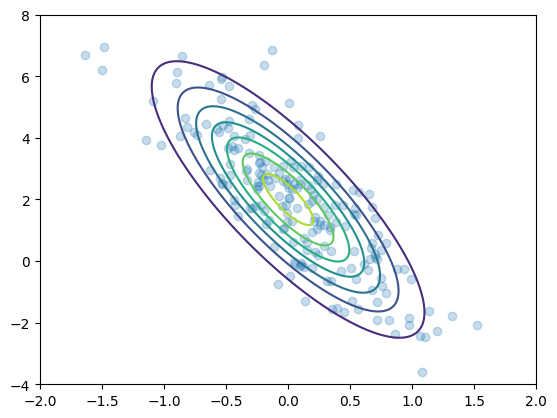

In [100]:
# create the x and y space for the plots to be possible
x = np.linspace(-2, 2, 200)
y = np.linspace(-4, 8, 200)
# creates the meshgrid to be plotted for the pdf
X, Y = np.meshgrid(x, y)    
# disply sampled and make them more transparent
plt.scatter(samples[:,0],samples[:,1], alpha=0.25)
# stack to create the pdf
pos = np.dstack((X,Y))
rv = multivariate_normal(mean, cov)
z = rv.pdf(pos)
# plot the contour
plt.contour(x,y,z)
plt.show()

## Problem 2 ##

In [101]:
# create the array
three_dim = np.array([[4, 2, 1], [2,3,1.5], [1, 1.5, 2]])
three_dim

array([[4. , 2. , 1. ],
       [2. , 3. , 1.5],
       [1. , 1.5, 2. ]])

In [102]:
mean2 = [0,0,0]
samples = np.random.multivariate_normal(mean2, three_dim, size=200) 

In [103]:
# i think this is right
U, S, V = np.linalg.svd(samples)
pc = np.dot(S,V)
print("PC:",pc)
# PCs are determined by the 

PC: [ -9.57046812 -37.60563803 -14.00289037]


In [109]:
corr = np.corrcoef(pc.T, three_dim.T)
print("Correlation: \n", corr)
# 

Correlation: 
 [[ 1.          0.33133468 -0.88650245 -0.14705695]
 [ 0.33133468  1.          0.14285714 -0.98198051]
 [-0.88650245  0.14285714  1.         -0.32732684]
 [-0.14705695 -0.98198051 -0.32732684  1.        ]]


In [105]:
proj_w = np.dot(three_dim, V.T)

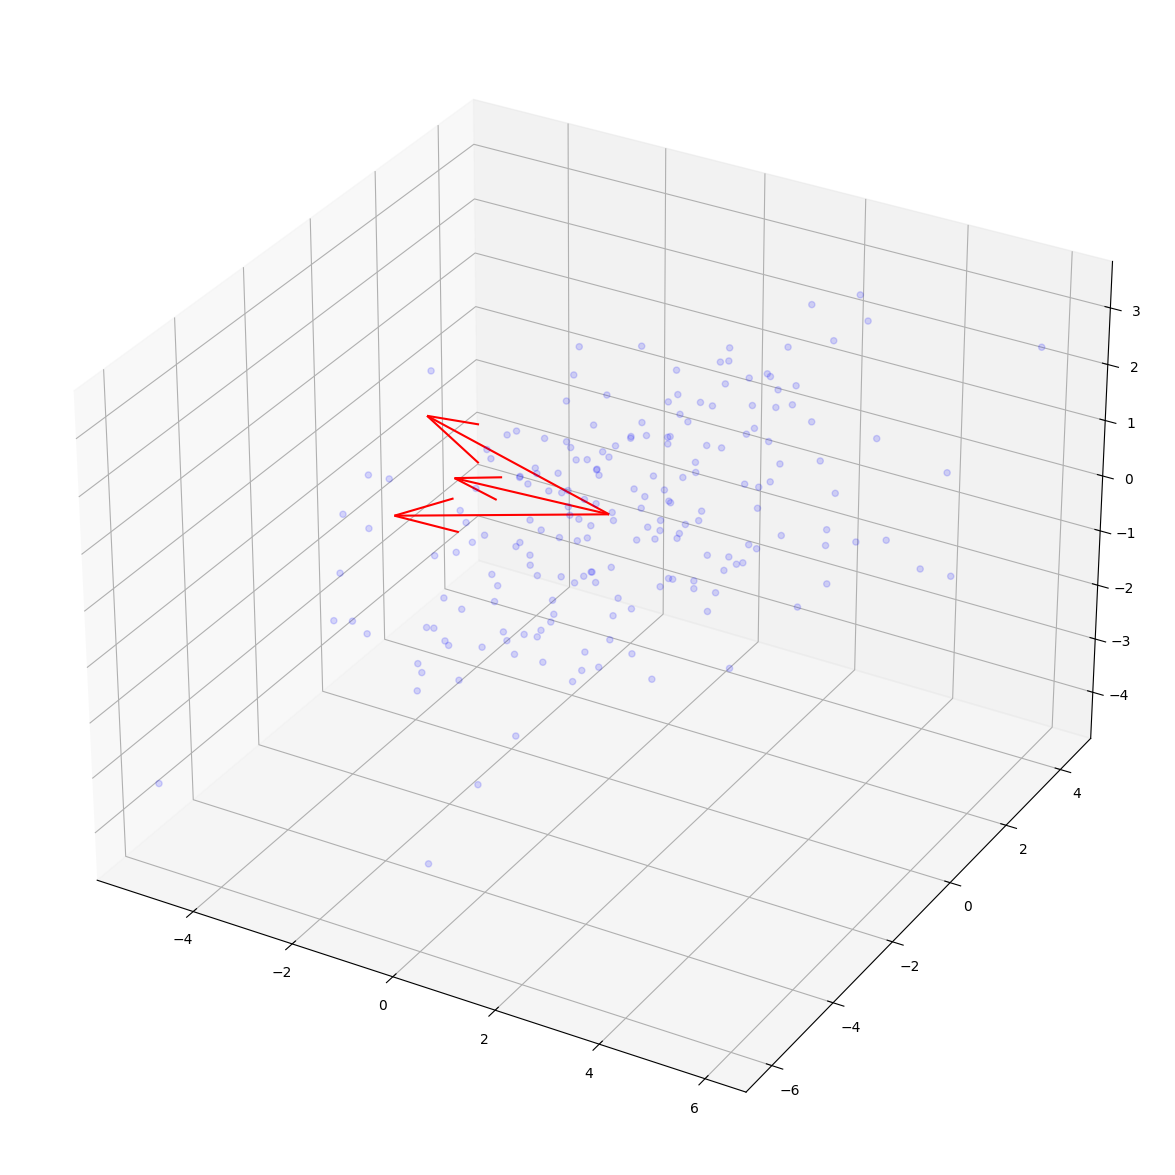

In [106]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, proj_w[:,0], proj_w[:,1], proj_w[:,2], color="red")
ax.scatter(samples[:,0], samples[:,1], samples[:,2], color="blue", alpha=.15)
plt.show()
# i think they agree with the correlation since all of them go to the same direction but I'm gonna be real no clue on what I am doing